## Climate Analysis Pipeline: Future changes in thunderstorm with warming

Ziwei Wang (4th year Geosci PhD student)


**Research interest:**

My general research focus is on how convective extremes (e.g., midlatitudes thunderstorms) and their associated societal impact respond to climate change. 

I am interested in approaching scientific questions with a combination of theory, observations, and climate models. 



In the following 10-20 minutes, I want to showcase how the coding skills you have learnt may be used to everyday research. 



**Goals:**
1.   Showcase some *pandas* DataFrame manipulation skills: merging and subsetting DataFrames. 
2.   Show how *matplotlib* is used to create a publication-ready fogure of the analysis. 


**Note:**
I am not planning to share the Dataset, so unfortunately you can't run the codes on your local machine as we move on. I will run it on my Google Colab, and the ipynb in the Github page is for people's reference after the lecture. 



### Background Information

The scientific question I want to answer here is: how do thunderstorms respond to a warming climate. In other words, in a warmer climate, will the thunderstorms become more (or less) frequent? Will the storms become more (or less) intense? 


**Big picture motivation for the project:**

Severe thunderstorms are strongly associated with socio-economic damages across sectors. 

See the [linked NWS website](https://www.weather.gov/lot/2021aug10-11) for description of the damages caused by the particular storm that happened on Aug 10th, 2021 around Chicago. The photos section has pictures of [tree torn down](https://www.weather.gov/images/lot/pastevents/2021/Aug10-11/Chicago_Damage_ArielCohen.jpg), [broken billboard](https://www.weather.gov/images/lot/pastevents/2021/Aug10-11/CrystalLake_Damage_BonnieSalm.jpg), and [damaged crops](https://www.weather.gov/images/lot/pastevents/2021/Aug10-11/Earlville_Damage_BobWaszak.jpg).  

(My experience: I was flying back to Chicago at that time, and my plane got delayed by an hour; not too bad, but it is affecting our everyday life.)



**Background knowledge:**

The metric for thunderstorms used here is *Convective Available Potential Energy (CAPE)*. It is physically linked to the maximum updraft velocity possible. It is a vital parameter for the forecast of convective storms on both weather and climate time scales.

Figure below is the operational model output of CAPE for the particular event we mentioned above. 

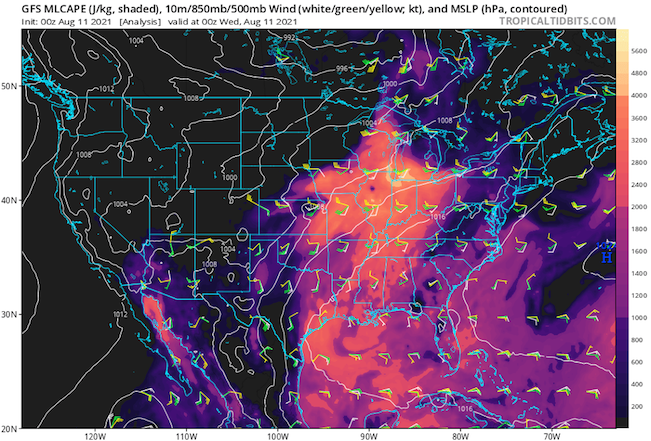

## Python scripts showcase

### Loading data

Load all the packages that is needed. Numpy, pandas, and matplotlib, I think you have seen those from the past lectures. A few others I want to highlight: 




1.   Scipy, you might or might not have heard of, is a useful package for statistical analysis in python. Linear regression, calculating integral, interpolation -- those are all things you could do with it. 

2.   For those who might do some research with geospatial/climate dataset, you might need metpy to calculate meteorological metrics that are not straightforward. E.g., if you will be dealing with heat stress in your research.

Note that on Google Colab, !pip installs the packages that are not pre-loaded on Google server. 



In [ ]:
### Load python packages
import numpy as np 
import pandas as pd                         

from scipy.odr import *
from scipy import stats

import matplotlib.pyplot as plt         
from matplotlib.colors import from_levels_and_colors
from matplotlib.colorbar import ColorbarBase

import warnings
warnings.simplefilter("ignore")

# Install metpy
!pip install metpy
import metpy.calc as mpcalc
from metpy.units import units
from metpy import constants


# to view dataframes interactivly
%load_ext google.colab.data_table

### To mount google drive in runtime to access files in the drive so you can access files
from google.colab import drive
drive.mount('/content/drive')

Load DataFrame from csv files. The three datasets are:


1.   Current climate: Ctrl simulation (CTRL)
2.   Future climate: Pseudo-global warming simulation (PGW)

  Both CTRL and PGW climate is derived from convective permitting model simulations under RCP8.5. 

3.   Synthetic future climate: Synthetic.

  Constructed from 3-parameters calculated from the mean change between the two climates above. The three parameters are changes in surface temperature, surface RH and 200hPa temperature. 




In [ ]:
# fs = 12

### Define filepaths to the csv files
filepath = '/content/drive/My Drive/CAPE_future/all_cape_ctrl_2001_2012.csv'
filepath_pgw = '/content/drive/My Drive/CAPE_future/all_cape_pgw_2001_2012.csv'
filepath_synthetic = '/content/drive/My Drive/CAPE_future/all_cape_ctrl_2001_2012_synthetic_lindrop_202012.csv'


### Load three datasets
df = pd.read_csv(filepath)
df.drop(columns = ['igra_lclhght', 'igra_lclpres', 'igra_lev_rh', 'igra_lfchght', 'igra_lfcpres','igra_lnbhght', 'igra_lnbpres', 'igra_mlcape', 'igra_mlcin', 'igra_mucape', 'igra_mucin', 'igra_mupres', 'igra_mutmpc','wrf_lclhght', 'wrf_lclpres', 'wrf_lfchght',
      'wrf_lfcpres', 'wrf_lnbhght', 'wrf_lnbpres', 'wrf_mlcape', 'wrf_mlcin', 'wrf_mucape', 'wrf_mucin', 'wrf_mupres', 'wrf_mutmpc'],inplace=True)
#df = df[(df.year != 2005) | (df.month != 2)].reset_index(drop=True)

df_pgw = pd.read_csv(filepath_pgw)
df_pgw.drop(columns = ['wrf_lclhght', 'wrf_lclpres', 'wrf_lfchght',
      'wrf_lfcpres', 'wrf_lnbhght', 'wrf_lnbpres', 'wrf_mlcape', 'wrf_mlcin',
      'wrf_mucape', 'wrf_mucin', 'wrf_mupres', 'wrf_mutmpc'],inplace = True)
'''
df_synthetic = pd.read_csv(filepath_synthetic)
df_synthetic.drop(columns = ['wrf_lclhght', 'wrf_lclpres', 'wrf_lfchght',
      'wrf_lfcpres', 'wrf_lnbhght', 'wrf_lnbpres', 'wrf_mlcape', 'wrf_mlcin',
      'wrf_mucape', 'wrf_mucin', 'wrf_mupres', 'wrf_mutmpc'],inplace = True)
df_synthetic = df_synthetic[(df_synthetic.year != 2005) | (df_synthetic.month != 2)].reset_index(drop=True)

'''
filepath_synthetic_pgw_rh = '/content/drive/My Drive/CAPE_future/all_cape_ctrl_2001_2012_synthetic_lindrop_rhM1_202012.csv' #pgw_rh

df_synthetic_pgw_rh = pd.read_csv(filepath_synthetic_pgw_rh)
df_synthetic_pgw_rh.drop(columns = ['wrf_lclhght', 'wrf_lclpres', 'wrf_lfchght',
      'wrf_lfcpres', 'wrf_lnbhght', 'wrf_lnbpres', 'wrf_mlcape', 'wrf_mlcin',
      'wrf_mucape', 'wrf_mucin', 'wrf_mupres', 'wrf_mutmpc'],inplace = True)
df_synthetic_pgw_rh = df_synthetic_pgw_rh[(df_synthetic_pgw_rh.year != 2005) | (df_synthetic_pgw_rh.month != 2)].reset_index(drop=True)

df = df[df.hour.isin([0,6,12,18])]
nhour = 4

#df['igra_rh'] = mpcalc.relative_humidity_from_dewpoint(np.asarray(df['igra_tmpc'])*units.K,np.asarray(df['igra_dwpc'])*units.K).magnitude
#df['wrf_rh'] = mpcalc.relative_humidity_from_dewpoint(np.asarray(df['wrf_tmpc'])*units.K,np.asarray(df['wrf_dwpc'])*units.K).magnitude
#df['wrf_rh_check'] = mpcalc.relative_humidity_from_specific_humidity(np.asarray(df['wrf_pres'])*units.mbar,np.asarray(df['wrf_tmpc'])*units.K,np.asarray(df['wrf_humd'])).magnitude
#df_pgw['wrf_rh'] = mpcalc.relative_humidity_from_dewpoint(np.asarray(df_pgw['wrf_tmpc'])*units.K,np.asarray(df_pgw['wrf_dwpc'])*units.K).magnitude



### Subsetting dataset -- Pandas

Now that we have loaded all three DataFrames, we want to **subset to the summertime only**. 

The motivation for that is: 

The thunderstorms are most common in midlatitudes summer. For example, you would see far more thunderstorms over Chicago from May-August each year, compared to other months. 

In [ ]:
summer_months = [5,6,7,8]

df_x = df[df.month.isin(summer_months)]
df_y = df_pgw[df_pgw.month.isin(summer_months)]
df_z = df_synthetic_pgw_rh[df_synthetic_pgw_rh.month.isin(summer_months)]


A few summaries of the lines above: 


1.   I use square brackets to subset the dataset. It is equivalent to `.loc[]`. Inside the bracket I use the condition matching the criteria I want to subset the DataFrame with. 
2.   I use `.variable_name` to select one variable from the DataFrame. This is equivalent with ['variable_name'].





### Merging dataset -- Pandas

Now that we have subsetted the DataFrame to the lines we want to keep, the next step is to merge those DataFrames into one. 

The motivation for that is: 

We are going to compare the climate variable (CAPE) between climate states, and the two climate states share the same time dimension. So the goal here is to merge the CTRL and PGW DataFrames by time. 

In [ ]:
### Merge CTRL and PGW datasets
df_ctrl_pgw = df_x.merge(df_y,how = 'left',on = ['year','date','month','hour','stn'])
#df_ctrl_offset = df_x.merge(df_z,how = 'left',on = ['year','date','month','hour','stn'])


A few summaries of the lines above: 

1.   I use the *merge* function dotted into the left DataFrame, and the first input parameter is the right DataFrame. 
2.   There are two additional parameters used here. 

The *on* parameter tells the function which columns should be used as the indexing columns -- i.e., if the left and right DataFrame have the same values for all these columns, those two lines will be merged. 

The *how* parameter tells the function which lines should be kept if the two DataFrame have different input



3.   Another parameter that is not used here is the *suffixes* parameter (suffixes=('_x', '_y')). This tells the function if the merged DataFrame have same column names, what should be used as a suffix appended at the end of the column corresponding to the left and right columns, so that we can distinguish them from each other. 


Here's explanation based on the example above: 

The two DataFrames both have a column named wrf_sbcape, and after being merged, they becomes wrf_sbcape_x and wrf_sbcape_y, respectively. 





The online documentation is linked below: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html






In [ ]:
df_ctrl_pgw.columns

### End with a publication-ready figure -- Matplotlib



**Color-shading:**
Heatmap of occurrence for a joint distribution. 

In our example, we have just merged the variable CAPE from current and future climate. The two datasets share the same spatial and temporal dimensionalities, and therefore, we could plot the joint distribution of occurrence with a heatmap. 

**Black line:**
Orthogonal distance regression. 

Orthogonal distance regression, or ODR, differs from the linear regression (or OLS) in the fact that errors in both x- and y- variables are minimized at the same time. This is useful for cases when the error in both the independent and the dependent variables matters. 

See Robin's blog linked [here](http://blog.rtwilson.com/orthogonal-distance-regression-in-python/) for in depth explanation. 

**Black dots:** 
A quantile-quantile (or Q-Q) plot is usually used to compare two distributions. 

In our example, CTRL and PGW CAPE arrays have the same number of elements. We pick 100 percentiles in both of them and plot them onto the heatmap, and the scatter of the points is the quantile-quantile plot. 

In [ ]:
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

Start preparing the data for the heatmap and Quantile-Quantile plot. 

In [ ]:
nbins=24
my_prof = 'wrf'

### Define the x and y bins, and one empty matrix for the heatmap
xbins = np.linspace(0,nbins*400,nbins+1)
ybins = np.linspace(0,nbins*400,nbins+1)
density_matrix_pgw = np.zeros((nbins,nbins))

nele = len(df_ctrl_pgw)
### loop through all bins in a heatmap
for xidx in range(nbins):
  for yidx in range(nbins):
    my_type = my_prof+'_sbcape'
    subset_pgw = df_ctrl_pgw[(df_ctrl_pgw[my_type+'_y'] >= ybins[yidx]) & (df_ctrl_pgw[my_type+'_y'] < ybins[yidx+1]) & (df_ctrl_pgw[my_type+'_x'] >= xbins[xidx]) & (df_ctrl_pgw[my_type+'_x'] < xbins[xidx+1])]
    density_matrix_pgw[yidx,xidx] = len(subset_pgw)*1./nele



Here, we aim to produce a figure that tells us how the metric CAPE in future and current climate differ from each other. We will use three analytical tools (done gradually, time permitting): 


1.   We will first plot a heatmap of the joint distribution. 
2.   We will add a orthogonal distance regression of the joint distribution to the figure. 

3.   We will add a quantile-quantile plot to compare the different quantiles of current and future climate CAPE. 

On the heatmap, we have already prepared the matrix that is needed as input in the code block above. 

So all we need is:



```
### plotting the joint distribution heatmap
ax = plt.subplot(1,1,1)
if plot_heatmap:
  ax.imshow(np.log10(plot_matrix), cmap=cmap_mean,aspect='auto',vmin = color_vmin, vmax = color_vmax, extent = [np.min(xbins),np.max(xbins),np.min(ybins),np.max(ybins)], origin = 'lower')
```



On the orthogonal distance regression, we first import the ODR functions from the scipy packages -- I learnt it all from Stack Overflow (very useful website). 

One example: 
https://stackoverflow.com/questions/39942083/simple-understanding-of-orthogonal-distance-regression-odr


The code that accomplishes it is: 


```
### plotting the orthogonal distance regression
linear = Model(f)
mydata = RealData(df_merge['wrf_sbcape_x'],df_merge['wrf_sbcape_y'], sx=df_merge['wrf_sbcape_x'].std(), sy=df_merge['wrf_sbcape_y'].std())
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

if plot_odr:
  plt.plot(xbins, myodr.output.beta[0]*xbins+myodr.output.beta[1],'k-',label='Ortho. dist. reg. \n y = %s x + %s'%(round(myodr.output.beta[0],2),int(myodr.output.beta[1])))
```



On the quantile-quantile scatter: 
Here you can see a group of larger dots, and another group of smaller dots. The larger dots mark the 1st to 99th percentiles, with increment by 1%. The smaller dots mark the 99.1th to 99.9th perncentiles, with increment by 0.1%. 

The codes that accomplishes it is: 



```

### overploting quantile-quantile scatters
a = np.array(subset['wrf_sbcape_x'])
b = np.array(subset['wrf_sbcape_y'])
nperc = 100
dperc=100/nperc

### Part I: 1st to 99th percentiles
percs = np.arange(0,100,dperc)


qn_a = np.nanpercentile(a, percs)
qn_b = np.nanpercentile(b, percs)

if plot_qqplot:
  ax.scatter(qn_a,qn_b, color = 'k',label = 'Quantiles')
ax.legend(frameon = False,bbox_to_anchor=(0.51, 0., 0.5, 0.3), fontsize = 12)

### Part II: 99.1st to 99.9th percentiles
zoom_percs = np.arange(99,99.9,0.1)
qn_a = np.nanpercentile(a, zoom_percs)
qn_b = np.nanpercentile(b, zoom_percs)
if plot_qqplot:
  ax.scatter(qn_a,qn_b, color = 'k',s = 10)
```




We want to ZOOM IN to the high tail of the distribution, because the most severe storms usually have extremely large CAPE -- i.e., we care about the largest CAPE values. 

In [ ]:
### A few switches for demonstration purposes:
plot_heatmap = True
plot_odr     = True
plot_qqplot  = True

remove_zero = False
nrow = 1
fs = 14
my_prof = 'WRF'

### colorbar limits
color_vmin = -6
color_vmax = 0


### Density plot for number of points in each bin (Calibration Figure)
fig = plt.figure(1,figsize=(8,8))
plt.subplots_adjust(wspace = 0.3)
my_levels = np.linspace(color_vmin,color_vmax,9)
cmap_mean,norm = from_levels_and_colors(levels=my_levels, colors=['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#084594'])


### I re-did this merge here, although you can just use df_ctrl_pgw we constructed before
df_merge = df_x.merge(df_y,how = 'left',on = ['year','date','month','hour','stn'])
my_title = 'PGW'
plot_matrix = density_matrix_pgw
ymax = 4

### Calculating the quantiles of x (CTRL climate) CAPE
subset = df_merge.copy()
hot_cape = subset[(subset.wrf_tmpc_x > 306) & (subset.wrf_tmpc_x <= 309) & (subset.wrf_rh_x < 0.51) & (subset.wrf_rh_x >= 0.49)]['wrf_sbcape_x'].mean()

if remove_zero:
  subset[['wrf_'+my_cape+'_x','wrf_'+my_cape+'_y']]= subset[['wrf_'+my_cape+'_x','wrf_'+my_cape+'_y']].replace(to_replace = 0,value = np.nan)
else:
  subset = subset
limit = len(subset[subset.wrf_sbcape_x  == 0])/len(subset[subset.wrf_sbcape_x >=0])
quant_1000 = len(subset[subset.wrf_sbcape_x < 1000])/len(subset[subset.wrf_sbcape_x >=0])
quant_2000 = len(subset[subset.wrf_sbcape_x < 2000])/len(subset[subset.wrf_sbcape_x >=0])
quant_3000 = len(subset[subset.wrf_sbcape_x < 3000])/len(subset[subset.wrf_sbcape_x >=0])
quant_4000 = len(subset[subset.wrf_sbcape_x < 4000])/len(subset[subset.wrf_sbcape_x >=0])
quant_hot = len(subset[subset.wrf_sbcape_x < hot_cape])/len(subset[subset.wrf_sbcape_x >=0])
print('1000 J/kg is %s percentile' % (quant_1000*100))
print('2000 J/kg is %s percentile' % (quant_2000*100))
print('3000 J/kg is %s percentile' % (quant_3000*100))
print('4000 J/kg is %s percentile' % (quant_4000*100))

### plotting the joint distribution heatmap
ax = plt.subplot(1,1,1)
if plot_heatmap:
  ax.imshow(np.log10(plot_matrix), cmap=cmap_mean,aspect='auto',vmin = color_vmin, vmax = color_vmax, extent = [np.min(xbins),np.max(xbins),np.min(ybins),np.max(ybins)], origin = 'lower')
### one-to-one line
ax.plot([np.min(xbins),np.max(xbins)],[np.min(ybins),np.max(ybins)],c = 'k',linestyle = '--',zorder =2)


### plotting the orthogonal distance regression
linear = Model(f)
mydata = RealData(df_merge['wrf_sbcape_x'],df_merge['wrf_sbcape_y'], sx=df_merge['wrf_sbcape_x'].std(), sy=df_merge['wrf_sbcape_y'].std())
myodr = ODR(mydata, linear, beta0=[1., 2.]) ### beta0 is your initial parameter estimate
myoutput = myodr.run()
myoutput.pprint()

if plot_odr:
  plt.plot(xbins, myodr.output.beta[0]*xbins+myodr.output.beta[1],'k-',label='Ortho. dist. reg. \n y = %s x + %s'%(round(myodr.output.beta[0],2),int(myodr.output.beta[1])))
ax.invert_yaxis()  

### customizing x and y ticks 
plt.xticks(labels=[str(int(x_tick)) for x_tick in xbins[0::5]],ticks= xbins[0::5])
plt.yticks(labels=[str(int(y_tick)) for y_tick in ybins[0::5]],ticks= ybins[0::5])


plt.xlim(np.min(xbins),np.max(xbins))
plt.ylim(np.min(ybins),np.max(ybins))

### adding x and y labels
plt.xlabel('CTRL CAPE (J/kg)',fontsize=fs)
plt.ylabel(my_title+' CAPE (J/kg)',fontsize=fs)

### overploting quantile-quantile scatters
a = np.array(subset['wrf_sbcape_x'])
b = np.array(subset['wrf_sbcape_y'])
nperc = 100
dperc=100/nperc

### Part I: 1st to 99th percentiles
percs = np.arange(0,100,dperc)
qn_a = np.nanpercentile(a, percs)
qn_b = np.nanpercentile(b, percs)

if plot_qqplot:
  ax.scatter(qn_a,qn_b, color = 'k',label = 'Quantiles')
ax.legend(frameon = False,bbox_to_anchor=(0.51, 0., 0.5, 0.3), fontsize = 12)

### Part II: 99.1st to 99.9th percentiles
zoom_percs = np.arange(99,99.9,0.1)
qn_a = np.nanpercentile(a, zoom_percs)
qn_b = np.nanpercentile(b, zoom_percs)
if plot_qqplot:
  ax.scatter(qn_a,qn_b, color = 'k',s = 10)

### adding colorbars
cax1 = fig.add_axes([0.15,-0.01,0.7,0.03])
cb1  = ColorbarBase(cax1,cmap=cmap_mean,orientation='horizontal') 
cb1.set_ticks([0,0.5,1.]) 
cb1.set_ticklabels([r'$10^{-6}$',r'$10^{-3}$',r'$10^0$'])
cb1.set_label('Log Density',fontsize =12)



#### One step further -- add a quantile-ratio plot

In the final step, we added a quantile-ratio plot onto the single-panel version. This brings us one step closer to the publication-ready figure, and I will not go into technical details here. 

The only thing I would like to introduce is the quantile-ratio plot. The most prominent strength of quantile-ratio plots is that they can highlight distributional shifts in a straightforward way. 

It is constructed by taking the ratio of quantile-quantile plots: therefore, in our case, when the quantile-ratio exceeds one, it indicates that the CAPE increases in the future. 

Here's the code that produces the quantile ratio plot (appears as the black scatters on the right panel that will appear after I run the next block). 



```
  ### Loop over the two cases: 1-99th percentiles, and the 99.1-99.9th percentiles
  for my_zoom,my_percs in zip([False, True],[percs, zoom_percs]):
    a = np.array(subset['wrf_'+my_cape+'_x'])
    b = np.array(subset['wrf_'+my_cape+'_y'])
    if not my_zoom:
      ax1.vlines(quant_1000*100,1.0,1.05)
      ax1.vlines(quant_2000*100,1.0,1.05)
      ax1.vlines(quant_3000*100,1.0,1.05)
      ax1.vlines(quant_4000*100,1.0,1.05)
    if my_zoom:
      marker_size = 4
    else:
      marker_size = 9  
    qn_a = np.nanpercentile(a, my_percs)
    nperc = len(my_percs)


    qn_b = np.nanpercentile(b, my_percs)
    quant_rat = qn_b*1./qn_a

    if my_zoom:
      ax1.plot(my_percs[:],quant_rat[:], ls=" ", marker=".",color='k',markersize=4)
    else:
      ax1.plot(my_percs[:],quant_rat[:], ls=" ", marker=".",color='k',markersize=9,label = 'PGW')
```



In [ ]:
### Density plot for number of points in each bin (Calibration Figure)
fig = plt.figure(1,figsize=(12,6*nrow))
plt.subplots_adjust(wspace = 0.3)
my_levels = np.linspace(color_vmin,color_vmax,9)
cmap_mean,norm = from_levels_and_colors(levels=my_levels, colors=['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#084594'])

for irow in range(nrow):
  if irow == 0:
    df_merge = df_x.merge(df_y,how = 'left',on = ['year','date','month','hour','stn'])
    my_title = 'PGW'
    plot_matrix = density_matrix_pgw
    ymax = 4
  else:
    df_merge = df_x.merge(df_z,how = 'left',on = ['year','date','month','hour','stn'])
    my_title = 'Offset'
    plot_matrix = density_matrix_offset
    ymax = 1.8

  subset = df_merge.copy()
  hot_cape = subset[(subset.wrf_tmpc_x > 306) & (subset.wrf_tmpc_x <= 309) & (subset.wrf_rh_x < 0.51) & (subset.wrf_rh_x >= 0.49)]['wrf_sbcape_x'].mean()

  if remove_zero:
    subset[['wrf_'+my_cape+'_x','wrf_'+my_cape+'_y']]= subset[['wrf_'+my_cape+'_x','wrf_'+my_cape+'_y']].replace(to_replace = 0,value = np.nan)
  else:
    subset = subset
  if irow == 0:
    limit = len(subset[subset.wrf_sbcape_x  == 0])/len(subset[subset.wrf_sbcape_x >=0])
    quant_1000 = len(subset[subset.wrf_sbcape_x < 1000])/len(subset[subset.wrf_sbcape_x >=0])
    quant_2000 = len(subset[subset.wrf_sbcape_x < 2000])/len(subset[subset.wrf_sbcape_x >=0])
    quant_3000 = len(subset[subset.wrf_sbcape_x < 3000])/len(subset[subset.wrf_sbcape_x >=0])
    quant_4000 = len(subset[subset.wrf_sbcape_x < 4000])/len(subset[subset.wrf_sbcape_x >=0])
    quant_hot = len(subset[subset.wrf_sbcape_x < hot_cape])/len(subset[subset.wrf_sbcape_x >=0])
    print('1000 J/kg is %s percentile' % (quant_1000*100))
    print('2000 J/kg is %s percentile' % (quant_2000*100))
    print('3000 J/kg is %s percentile' % (quant_3000*100))
    print('4000 J/kg is %s percentile' % (quant_4000*100))

  ax = plt.subplot(nrow,2,1+irow*2)
  ax.imshow(np.log10(plot_matrix), cmap=cmap_mean,aspect='auto',vmin = color_vmin, vmax = color_vmax, extent = [np.min(xbins),np.max(xbins),np.min(ybins),np.max(ybins)], origin = 'lower')
  ax.plot([0,21],[0,21],c = 'k',linestyle = '--',zorder =2)
  slope, intercept, r_value, p_value, std_err = stats.linregress(df_merge['wrf_sbcape_x'],df_merge['wrf_sbcape_y'])



  linear = Model(f)
  mydata = RealData(df_merge['wrf_sbcape_x'],df_merge['wrf_sbcape_y'], sx=df_merge['wrf_sbcape_x'].std(), sy=df_merge['wrf_sbcape_y'].std())
  myodr = ODR(mydata, linear, beta0=[1., 2.])
  myoutput = myodr.run()
  myoutput.pprint()


  #my_xbins = np.arange(0,nbins)
  #plt.plot(my_xbins, slope*my_xbins+intercept/8400*nbins,'g--',label='best fit: y = %s x + %s'%(round(slope,2),round(intercept,2)))
  plt.plot(xbins, myodr.output.beta[0]*xbins+myodr.output.beta[1]/8400*nbins,'k-',label='Ortho. dist. reg. \n y = %s x + %s'%(round(myodr.output.beta[0],2),int(myodr.output.beta[1])))


  ax.invert_yaxis()  
  plt.xticks(labels=[str(int(x_tick)) for x_tick in xbins[0::5]],ticks= xbins[0::5])
  plt.yticks(labels=[str(int(y_tick)) for y_tick in ybins[0::5]],ticks= ybins[0::5])


  plt.xlim(np.min(xbins),np.max(xbins))
  plt.ylim(np.min(ybins),np.max(ybins))  

  plt.xlabel('CTRL CAPE (J/kg)',fontsize=fs)
  plt.ylabel(my_title+' CAPE (J/kg)',fontsize=fs)

  a = np.array(subset['wrf_sbcape_x'])
  b = np.array(subset['wrf_sbcape_y'])

  ### define the quantiles to evaluate the distribution on
  nperc = 100
  dperc=100/nperc
  percs = np.arange(0,100,dperc)


  qn_a = np.nanpercentile(a, percs)
  qn_b = np.nanpercentile(b, percs)  

  ax.scatter(qn_a,qn_b, color = 'k',label = 'Quantiles')
  ax.legend(frameon = False,bbox_to_anchor=(0.51, 0., 0.5, 0.3), fontsize = 12)
  
  ### Plot the quantiles above 99th in smaller dots
  zoom_percs = np.arange(99,99.9,0.1)
  qn_a = np.nanpercentile(a, zoom_percs)
  qn_b = np.nanpercentile(b, zoom_percs)

  ax.scatter(qn_a,qn_b, color = 'k',s = 10)
  

  if nrow == 1:
    cax1 = fig.add_axes([0.15,-0.01,0.3,0.03])
  if nrow == 2:
    cax1 = fig.add_axes([0.15,0.02,0.3,0.03])
  cb1  = ColorbarBase(cax1,cmap=cmap_mean,orientation='horizontal')
  cb1.set_ticks([0,0.5,1.]) 
  cb1.set_ticklabels([r'$10^{-6}$',r'$10^{-3}$',r'$10^0$'])
  cb1.set_label('Log Density',fontsize =12)

  ### Start the second subplot here -- quantile-ratio plot
  ax1 = plt.subplot(nrow,2,2+irow*2)
  my_cape = 'sbcape'

  ### Loop over the two cases: 1-99th percentiles, and the 99.1-99.9th percentiles
  for my_zoom,my_percs in zip([False, True],[percs, zoom_percs]):
    a = np.array(subset['wrf_'+my_cape+'_x'])
    b = np.array(subset['wrf_'+my_cape+'_y'])
    if not my_zoom:
      ax1.vlines(quant_1000*100,1.0,1.05)
      ax1.vlines(quant_2000*100,1.0,1.05)
      ax1.vlines(quant_3000*100,1.0,1.05)
      ax1.vlines(quant_4000*100,1.0,1.05)
    if my_zoom:
      marker_size = 4
    else:
      marker_size = 9  
    qn_a = np.nanpercentile(a, my_percs)
    nperc = len(my_percs)


    qn_b = np.nanpercentile(b, my_percs)
    quant_rat = qn_b*1./qn_a

    if my_zoom:
      ax1.plot(my_percs[:],quant_rat[:], ls=" ", marker=".",color='k',markersize=4)
    else:
      ax1.plot(my_percs[:],quant_rat[:], ls=" ", marker=".",color='k',markersize=9,label = 'PGW')
    if not remove_zero:
      ax1.set_xlim((limit*100.,100.5))
    else:
      ax1.set_xlim((0,100.5))    
    ax1.set_ylim((1.,ymax))
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=3)

    ### Fractional change with all cases (4.65K) and 9.7%/K
    ax1.hlines(1.45,0,100.5,color = 'lightgray') 

    ### Calculate synthetic PGW fractional change
    for df_add, my_type, my_color in zip([df_synthetic_pgw_rh],['3-param'],['green']):
      subset_offset = df_x.merge(df_add,how = 'left',on = ['year','date','month','hour','stn'])
      subset_offset = subset_offset.drop(columns = ['Unnamed: 0.1_x'])

      if remove_zero:
        subset_offset[['wrf_'+my_cape+'_x','wrf_'+my_cape+'_y']]= subset_offset[['wrf_'+my_cape+'_x','wrf_'+my_cape+'_y']].replace(to_replace = 0,value = np.nan)
      if my_type == 'SO13':
        subset_offset= subset_offset[subset_offset.wrf_sbcape_x > 1000]
      a = np.array(subset_offset['wrf_'+my_cape+'_x'])
      qn_a = np.nanpercentile(a, my_percs)

      b = np.array(subset_offset['wrf_'+my_cape+'_y'])
      qn_b = np.nanpercentile(b, my_percs)
      quant_rat =  (qn_b*1./qn_a)

      if my_zoom:
        ax1.plot(my_percs,quant_rat,marker = '.',ls = ' ',c= my_color,markersize=4)
      else:
        ax1.plot(my_percs,quant_rat,marker = '.',ls = ' ',c= my_color,label = my_type,markersize=9)

  ax1.set_ylabel('Quantile ratio',fontsize = fs)
  ax1.set_xlabel('Percentiles',fontsize = fs)

  if irow == 0:
    plt.legend(frameon=False, fontsize = 12)
  
fig.savefig('Figure1_quantile_ratio.png',dpi=100, bbox_inches='tight')


## Summary

### Coding

In summary, the coding skills applied here are: 

> Using Pandas to manipulate datasets, includeing merging two different DataFrames, subsetting the merged DataFrame.

> Using matplotlib to plot a publication-ready figure. One thing I have learnt is that, to make one publication-ready figure, you will need to iterate hundreds and thousands of times on one figure, and make progress step by step. 


Note that what I showed is only one segment in one project. The same set of coding skills shown above could be applied to solve various of problems.



Two examples of my other projects includes: 

> Comparing climate model and observed climate variables. 

> Evaluating social impacts of convective extremes, by merging geospatial data (reanalysis dataset) and socioecnomic data (damage caused by severe thunderstorms).  

### Research

If you are interested, the single take-away point for the thunderstorm story is: 


> **It is expected that the thunderstorms will become more intense with warming.**




A few other comments are: 

> As the last figure showed, a simple enough synthetic future (constructed with only three mean changes) could readily reproduce the distributional shift of CAPE between climate states. This simple model that can further our understanding of the projection of thunderstorms. 

> The metric we use (CAPE) is also part of a covariate that is used for thundertorm occurrence, but given that we are not directly evaluating this covariate, I won't make any over-claim. 



